In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

C:\Users\Harshvardhan Sharma\AppData\Local\Temp\ipykernel_3684\1059379361.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df.drop(['availability', 'area_type', 'society', 'balcony'], axis=1)

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2.dropna(inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2.shape

(13246, 5)

In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df2[~df2['total_sqft'].apply(isFloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    
    if(len(tokens) == 2):
        return (float(tokens[0])+float(tokens[1]))/2
    
    try:
        return float(x)
    except:
        return None

In [18]:
df3 = df2.copy()

df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df4 = df3.copy()

df4['price_per_sqft'] = 100000*df4['price']/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [27]:
len(df4['location'].unique())

1304

In [30]:
df4['location'] = df4['location'].apply(lambda x: x.strip())

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [32]:
locations_less_than_10 = location_stats[location_stats <= 10]
locations_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [35]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df4['location'].unique())

242

In [36]:
df5 = df4.copy()

df5['sqft_per_bedroom'] = df5['total_sqft']/df5['bhk']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.0


In [38]:
df5[df5['sqft_per_bedroom']<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bedroom
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804,170.000000
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333,75.000000
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810,234.500000
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296,168.750000
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000,166.666667
...,...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571,200.000000
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333,200.000000
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091,275.000000
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649,154.800000


In [40]:
df6 = df5[~(df5['sqft_per_bedroom']<300)]
df6.shape

(12502, 8)

In [41]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-sd)) & (subdf.price_per_sqft <= (m+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    
    return df_out

df7 = remove_outliers(df6)
df7.shape

(10241, 8)

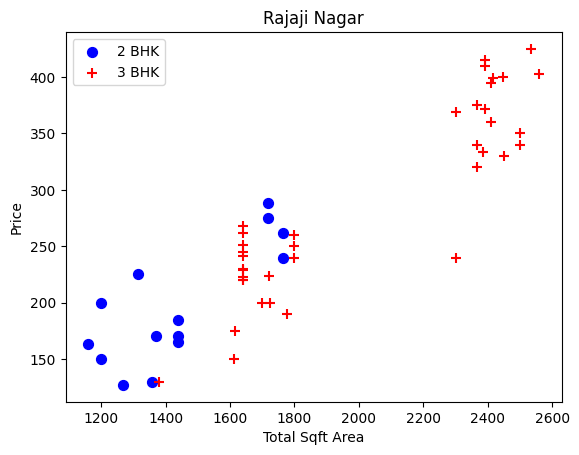

In [44]:
def plot_scatter_plot(df, location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='red', label='3 BHK', s=50)
    plt.xlabel('Total Sqft Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()
    
plot_scatter_plot(df7, 'Rajaji Nagar')
    

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df, in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
                
    return df.drop(exclude_indices, axis = 0)

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 8)

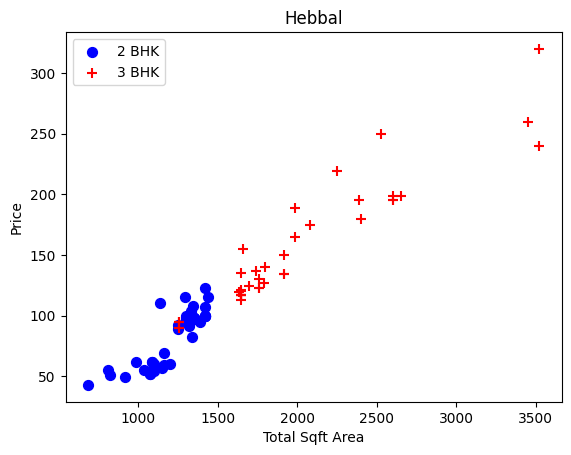

In [47]:
plot_scatter_plot(df8, 'Hebbal')

Text(0, 0.5, 'Count')

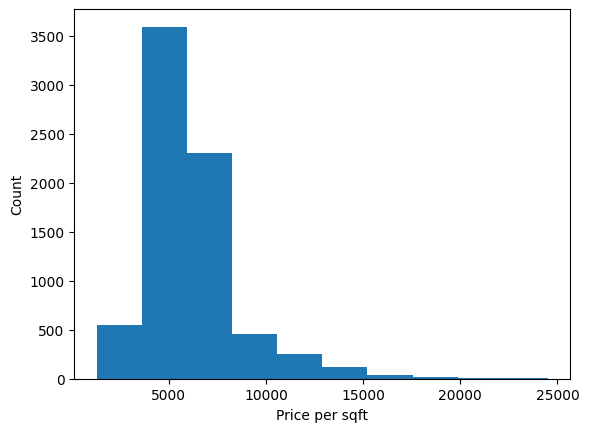

In [51]:
df8['price_per_sqft'].hist(grid=False)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

In [52]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [53]:
df8[df8['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bedroom
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000,400.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000,1200.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000,625.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000,545.454545
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424,417.307692


Text(0, 0.5, 'Count')

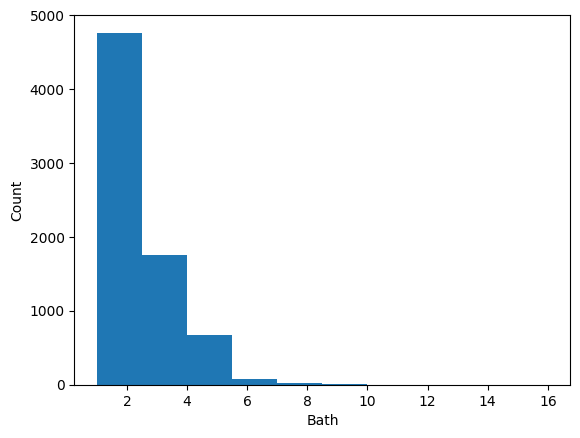

In [54]:
plt.hist(df8['bath'])
plt.xlabel('Bath')
plt.ylabel('Count')

In [57]:
df9 = df8[df8['bath']<df8['bhk']+2]
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bedroom
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,712.500000
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,543.333333
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,625.000000
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,400.000000
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,617.500000


In [58]:
df10 = df9.drop(['size', 'price_per_sqft', 'sqft_per_bedroom'], axis=1)
df10.shape

(7251, 5)

In [59]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [61]:
dummies = pd.get_dummies(df10['location'])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [62]:
df11 = pd.concat([df10, dummies.drop('other', axis=1)], axis = 1)
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
df12 = df11.drop('location', axis=1)
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
X = df12.drop('price', axis = 1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [84]:
y = df12['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [86]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.8452277697874446

In [87]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv= cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


    
find_best_model(X, y)

C:\Users\Harshvardhan Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Harshvardhan Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Harshvardhan Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Harshvardhan Sharma\AppData\Roaming\Python\Python312\site-packages\skl

,model,best_score,best_params
0,linear_regression,0.819001,{'fit_intercept': False}
1,lasso,0.687448,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.721906,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [89]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
        x[loc_index] = 1
        
    return lr_model.predict([x])[0]

In [92]:
predict_price('Indira Nagar', 1000, 2, 2)

C:\Users\Harshvardhan Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.2781548400592

In [93]:
import pickle

with open('bangalore_real_estate_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

In [96]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))